In [169]:
import numpy as np
import pandas as pd
from time import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
data = pd.read_csv('census.csv')

In [171]:
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [172]:
n_records = len(data)
n_greater_50K = len(data[data['income'] == '>50K'])
n_at_most_50K = len(data[data['income'] == '<=50K'])
greater_precent = n_greater_50K/n_records
print ('Number of Records: {}'.format(n_records))
print ('Individuals making more than $50,000: {}'.format(n_greater_50K))
print ("Individuals making at most $50,000: {}".format(n_at_most_50K))
print ('Percentage of individuals making more than $50,00: {:.2f}%'.format(greater_precent))

Number of Records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,00: 0.25%


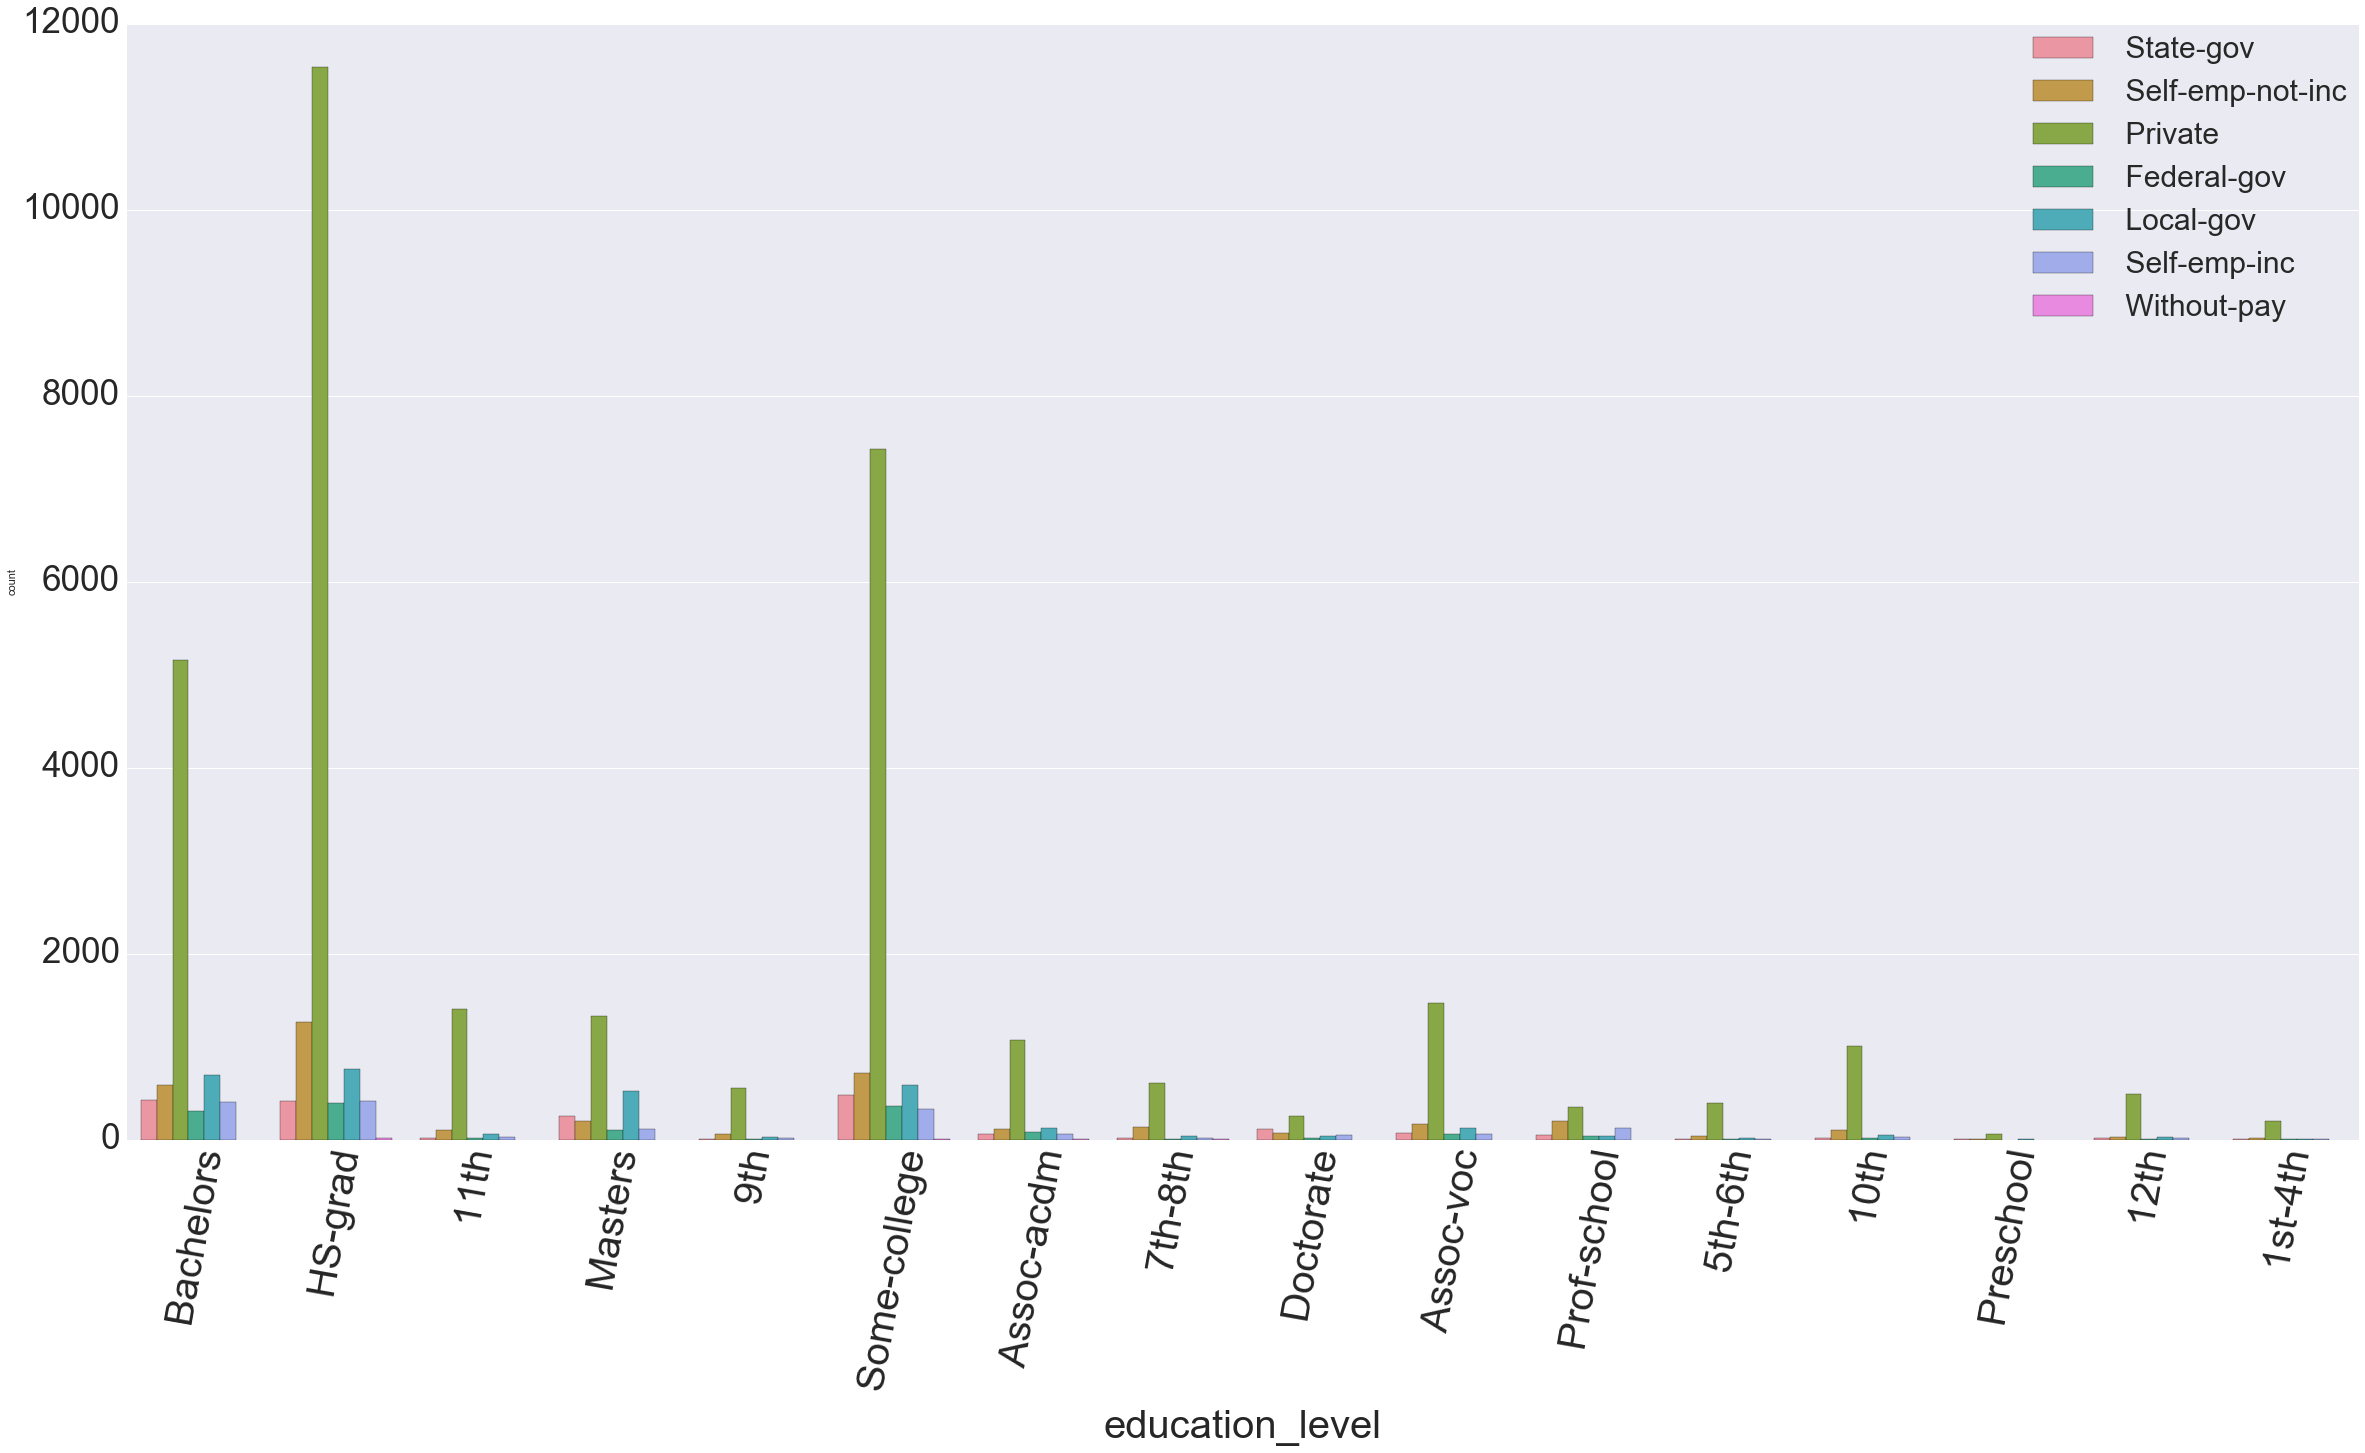

In [173]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 80,fontsize = 40)
plt.yticks(fontsize = 35)
plt.xlabel('education level',fontsize = 40)
matplotlib.rc("legend", fontsize=30)
ax = sns.countplot(data.education_level,hue = data.workclass,orient = 'h')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)

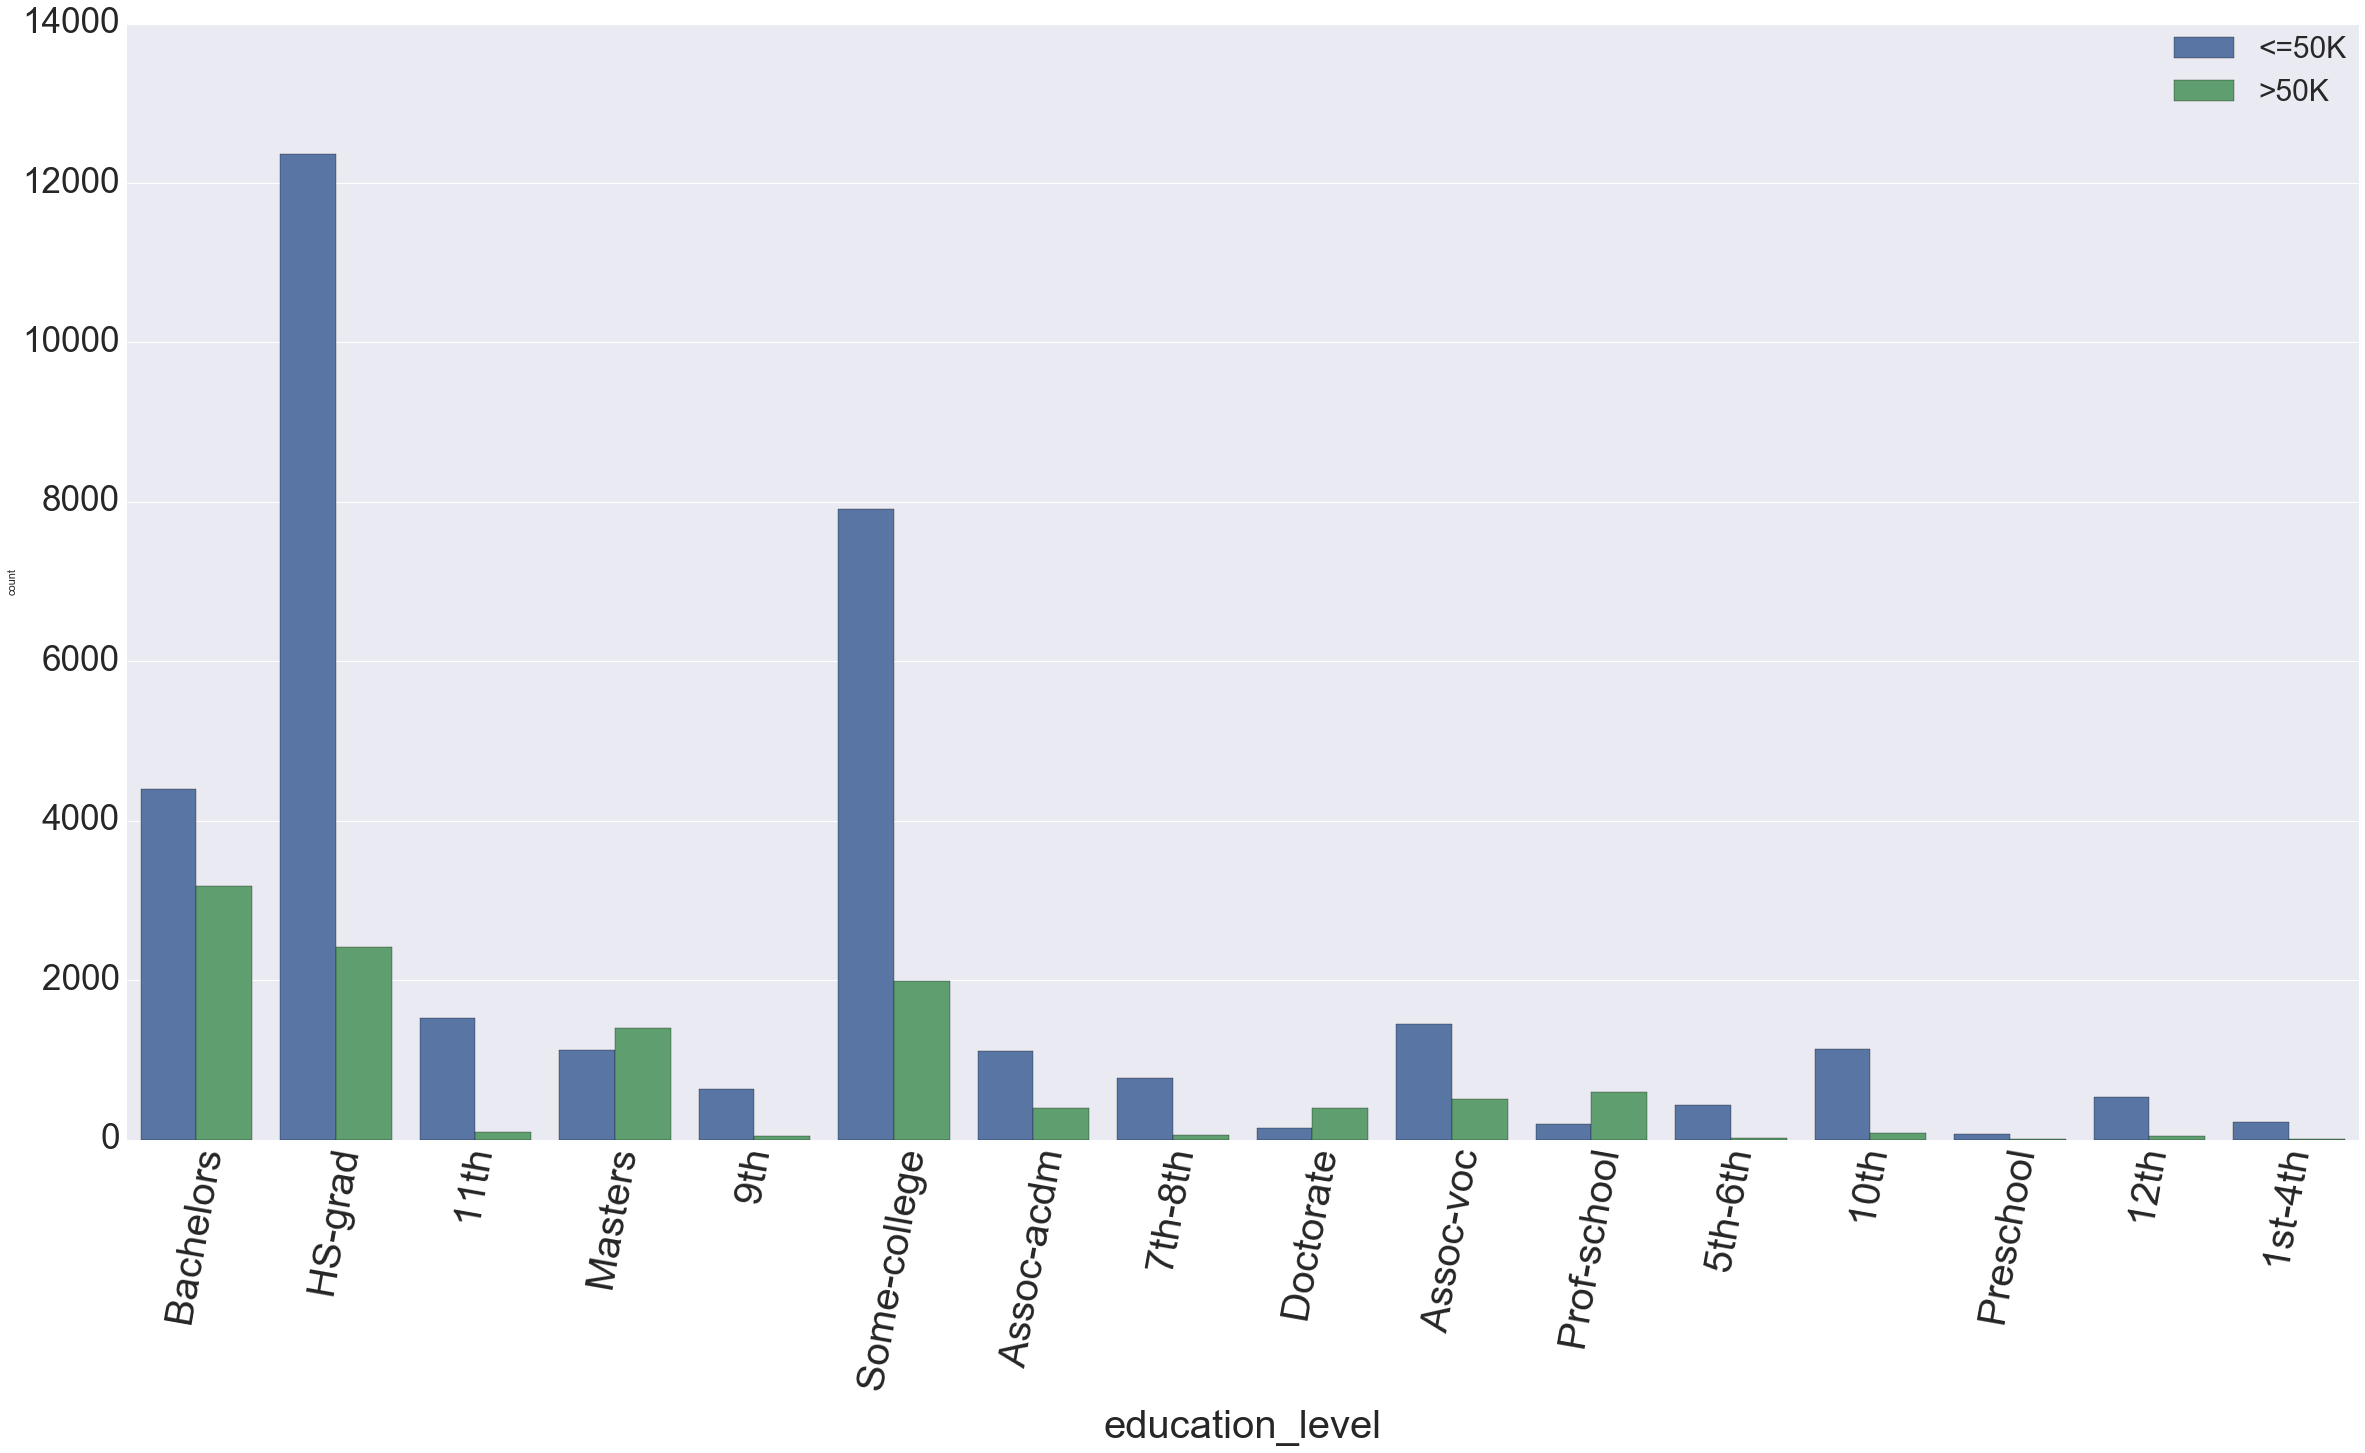

In [174]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 80,fontsize = 40)
plt.yticks(fontsize = 35)
plt.xlabel('education level',fontsize = 40)
matplotlib.rc("legend", fontsize=30)
ax = sns.countplot(data.education_level,hue = data.income,orient = 'h')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

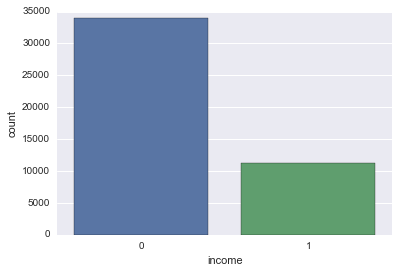

In [200]:
sns.countplot(data.income)

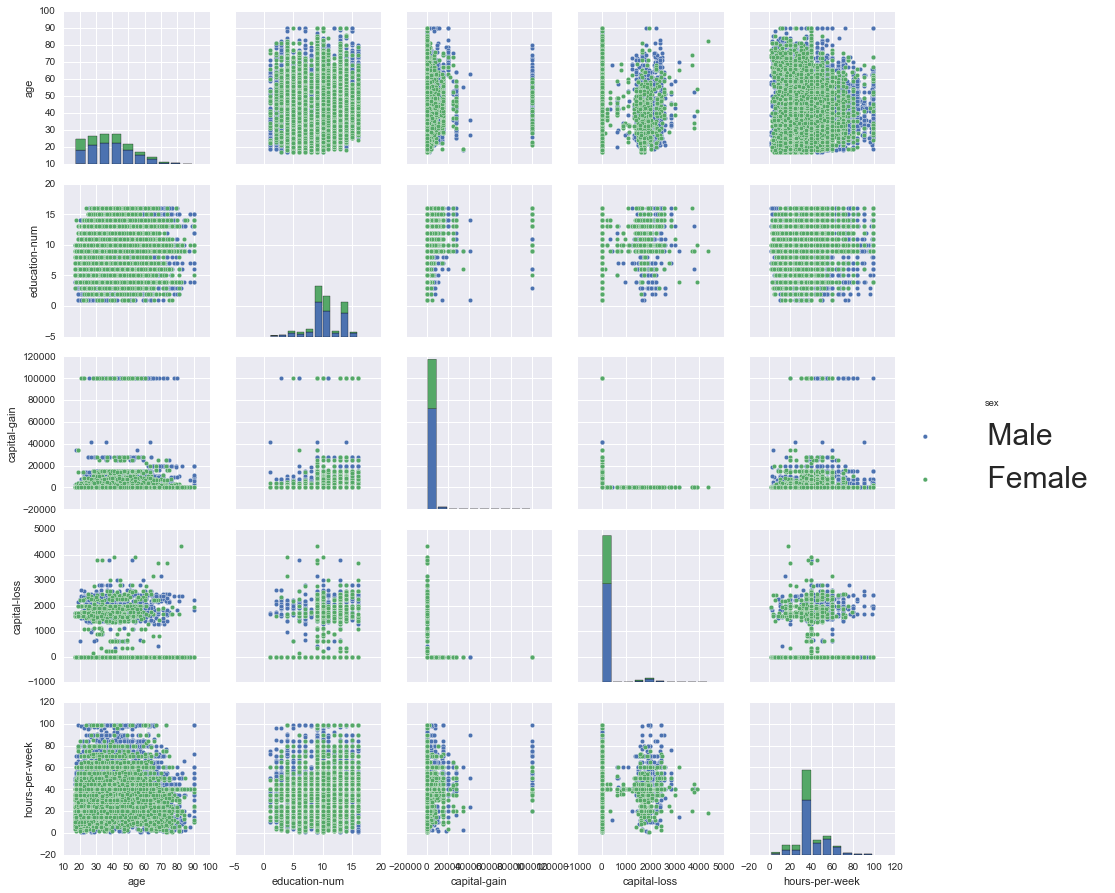

In [175]:
sns.pairplot(data,hue = 'sex')

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


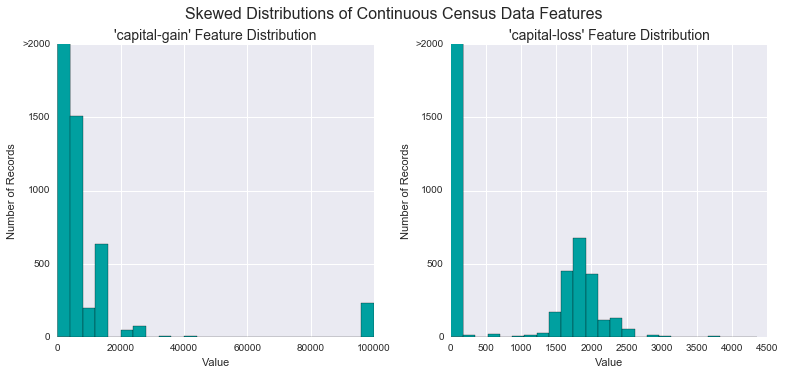

In [176]:
def distribution(data, transform = False):
    fig = plt.figure(figsize = (11,5))
    for i,f in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1,2,i+1)
        ax.hist(data[f],bins = 25,color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(f),fontsize = 14)
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of Records')
        ax.set_ylim((0,2000))
        ax.set_yticks([0,500,1000,1500,2000])
        ax.set_yticklabels([0,500,1000,1500,'>2000'])
    if transform:
        fig.suptitle('Log-transformed Distributions of Continuous Census Data Features', \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
distribution(data)

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


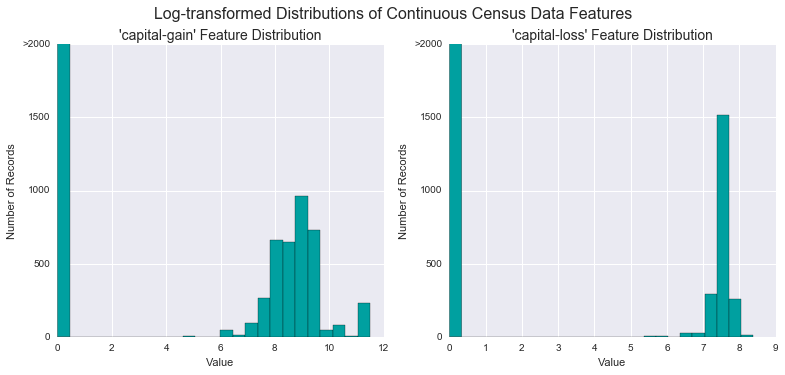

In [177]:
data[['capital-gain','capital-loss']] = data[['capital-gain','capital-loss']].apply(lambda x: np.log(x+1))
distribution(data,transform = True)

In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[numerical] = scaler.fit_transform(data[numerical])

In [179]:
cat = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
cat_features = pd.get_dummies(data[cat])

In [180]:
data['income'] = data['income'].map(lambda x: 0 if x == '<=50K' else 1)

In [194]:
data_pro = data.drop(cat,axis = 1)
data_pro = data_pro.drop(['income'],axis = 1)

In [195]:
data_pro = pd.concat([data_pro,cat_features],axis = 1)

In [196]:
print ('{} total features after one-hot encoding.'.format(len(data_pro.columns)))

103 total features after one-hot encoding.


In [197]:
income = data.income

In [198]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_pro,income, test_size = 0.2,random_state = 0)

In [199]:
print ('training set has {} sample'.format(len(X_train)))
print ('testing set has {} sample'.format(len(X_test)))

training set has 36177 sample
testing set has 9045 sample


In [201]:
accuracy = data[data['income']==1].shape[0]/data.shape[0]

In [203]:
precision = data[data['income'] == 1].shape[0]/data.shape[0]
recall = 1
fscore = (1+0.25)*((precision*recall)/((0.5*precision)+recall))

In [209]:
print ("[The accuracy score is: {:.4f}, and fscore is: {:.4f}]".format(accuracy, fscore))

[The accuracy score is: 0.2478, and fscore is: 0.2756]


In [205]:
precision

0.2478439697492371

In [299]:
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner,sample_size,X_train,y_train,X_test,y_test):
    results = {}
    start = time()
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time()
    results['train time'] = end - start
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end-start
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train,normalize = True)
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta = 0.5)
    results['acc_test'] = accuracy_score(y_test,predictions_test,normalize = True)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta = 0.5)
    
    print('{} trained on {} samples.'.format(learner.__class__.__name__,sample_size))
    return results

In [300]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import SVC


clf_A = GaussianNB()
clf_B = DecisionTreeClassifier()
clf_C = RandomForestClassifier()
clf_D = AdaBoostClassifier()
clf_E = GradientBoostingClassifier()
clf_F = BaggingClassifier()
clf_G = KNeighborsClassifier()
clf_H = SGDClassifier()
clf_I = LogisticRegression()
clf_J = SVC()

sample_1 = round(X_train.shape[0]*0.01)
sample_2 = round(X_train.shape[0]*0.1)
sample_3 = X_train.shape[0]

results = {}
for clf in [clf_A,clf_B,clf_C,clf_D,clf_E,clf_F,clf_G,clf_H,clf_I,clf_J]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,sample in enumerate([sample_1,sample_2,sample_3]):
        results[clf_name][i] = train_predict(clf,sample,X_train,y_train,X_test,y_test)

GaussianNB trained on 362 samples.
GaussianNB trained on 3618 samples.
GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 362 samples.
GradientBoostingClassifier trained on 3618 samples.
GradientBoostingClassifier trained on 36177 samples.
BaggingClassifier trained on 362 samples.
BaggingClassifier trained on 3618 samples.
BaggingClassifier trained on 36177 samples.
KNeighborsClassifier trained on 362 samples.
KNeighborsClassifier trained on 3618 samples.
KNeighborsClassifier trained on 36177 samples.
SGDClassifier trained on 362 samples.
SGDClassifi

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 3618 samples.
SVC trained on 36177 samples.


array([0, 1, 2, 3])

In [304]:
import matplotlib.patches as mpatches
def evaluate(results,accuracy,f1):
    fig,ax = plt.subplots(2, 3, figsize = (22,14))
    bar_width = 0.09
    colors = ['#a00000','#a05800','#9da000','#48a000','#00a088','#0045a0','#4a00a0','#8a00a0','#a00070','#a00052']
    for k, learner in enumerate(results.keys()):
        for j,metric in enumerate(['train time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j/3, j%3].set_xlabel("Training Set Size")
                ax[j/3, j%3].set_xlim((-0.1, 3.0))
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


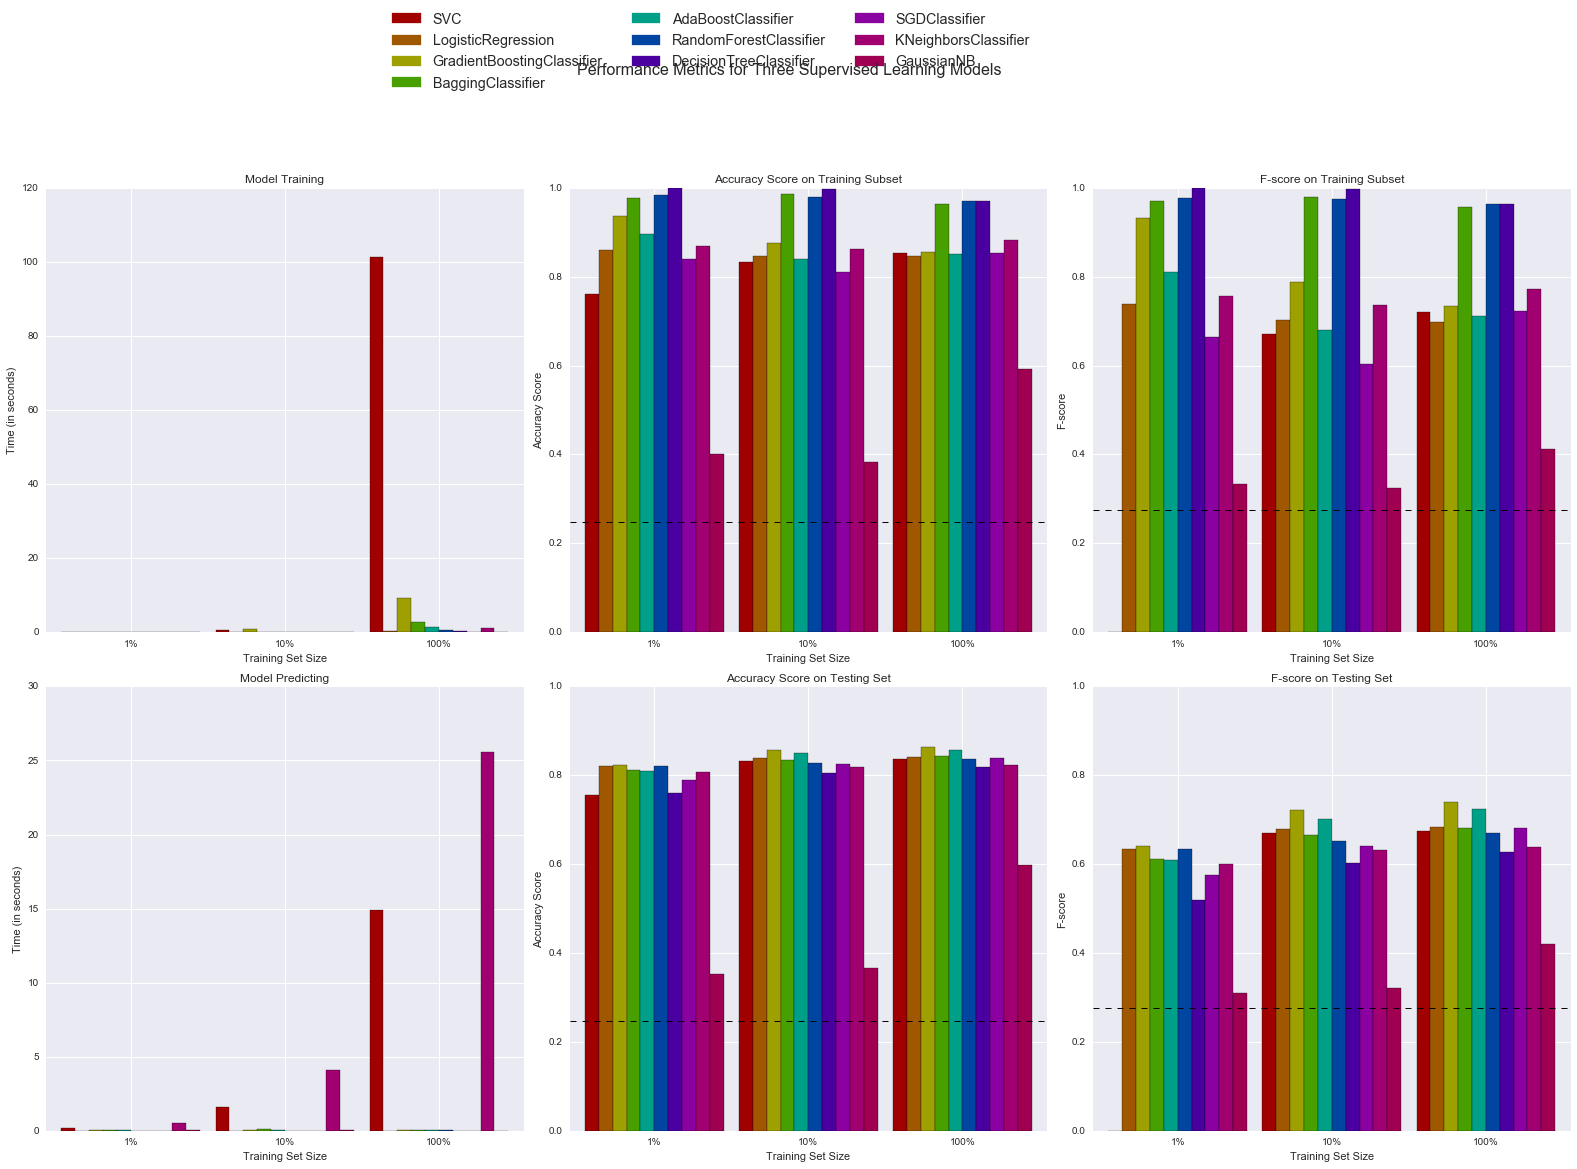

In [305]:
evaluate(results,accuracy,fscore)

In [315]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
clf = RandomForestClassifier(random_state = 0)
parameters = {'n_estimators':[5,10,50,100],'max_depth':[None,3,6,10]}
scorer = make_scorer(fbeta_score,beta=0.5)
grid_obj = GridSearchCV(clf,parameters,scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

In [316]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [320]:
predictions=clf.fit(X_train,y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

print ('Unoptimized model\n-----------')
print ('Accuracy Score on testing data:{:.4f}'.format(accuracy_score(y_test,predictions)))
print ('F-score on testing data:{:.4f}'.format(fbeta_score(y_test,predictions,beta = 0.5)))
print ('Optimized model\n------------')
print ('Final accuracy Score on testing data: {:.4f}'.format(accuracy_score(y_test,best_predictions)))
print ('Final F-score on testing data: {:.4f}'.format(fbeta_score(y_test,predictions, beta= 0.5)))

Unoptimized model
-----------
Accuracy Score on testing data:0.8378
F-score on testing data:0.6717
Optimized model
------------
Final accuracy Score on testing data: 0.8541
Final F-score on testing data: 0.6717


In [ ]:
importance = best_clf.fit(X_train,y_train).feature_importances_

In [354]:
indices = np.argsort(importance)[::-1]

In [357]:
top = []
for i in range(5):
    a=X_train.columns.values[indices[i]]
    top.append(a)
top

['marital-status_ Married-civ-spouse',
 'capital-gain',
 'education-num',
 'relationship_ Husband',
 'age']

In [345]:
importance[indices[:5]]

array([ 0.18710823,  0.16498152,  0.11002855,  0.09170943,  0.05651586])

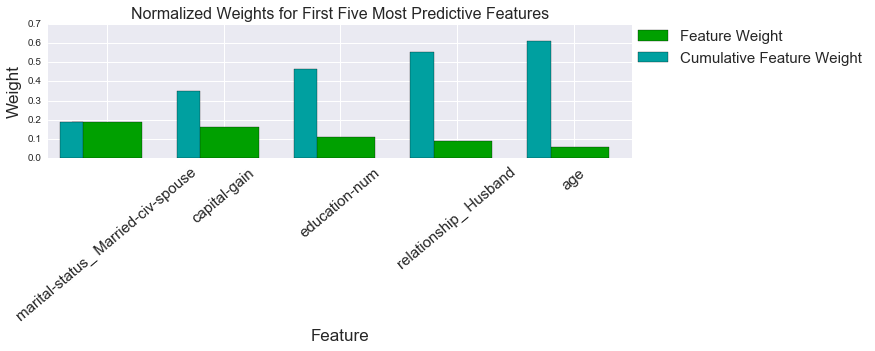

In [369]:
def feature_plot(importance,X_train,y_train):
    indices = np.argsort(importance)[::-1]
    features = X_train.columns.values[indices[:5]]
    values = importance[indices[:5]]
    
    matplotlib.rc("legend", fontsize=15)
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), features,fontsize = 15,rotation = 40)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 17)
    plt.xlabel("Feature", fontsize = 17)
    
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show() 
    
feature_plot(importance, X_train,y_train)   

In [370]:
from sklearn.base import clone
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importance)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importance)[::-1])[:5]]]
clf = (clone(best_clf)).fit(X_train_reduced,y_train)
reduced_prediction = clf.predict(X_test_reduced)

In [373]:
print ("Final model trained on full data\n--------------")
print ('Accuracy on testing data is {:.4f}'.format(accuracy_score(y_test,best_predictions)))
print ('F-score on testing data is {:.4f}'.format(fbeta_score(y_test,best_predictions,beta =0.5)))
print ('Final model trained on reduced data\n-------------')
print ('Accuracy on testing data is {:.4f}'.format(accuracy_score(y_test,reduced_prediction)))
print ('F-socre on testing data is {:.4f}'.format(fbeta_score(y_test,reduced_prediction, beta=0.5)))

Final model trained on full data
--------------
Accuracy on testing data is 0.8541
F-score on testing data is 0.7240
Final model trained on reduced data
-------------
Accuracy on testing data is 0.8456
F-socre on testing data is 0.7016
